In [12]:
import rasterio     # import the main rasterio function
from rasterio.plot import show, show_hist # some specific rasterio functions we'll need
import matplotlib   # matplotlib is the primary python plotting and viz library
import matplotlib.pyplot as plt
import folium       # folium is an interactive mapping library
import numpy as np

In [2]:
# add all the file paths to a list
s2_bands = ["data/sentinel-2/2018-10-13, Sentinel-2B L1C, B02.tiff", 
        "data/sentinel-2/2018-10-13, Sentinel-2B L1C, B03.tiff", 
        "data/sentinel-2/2018-10-13, Sentinel-2B L1C, B04.tiff",
        "data/sentinel-2/2018-10-13, Sentinel-2B L1C, B08.tiff"]

# open these files and add all bands to an array
arrs = []
for band in s2_bands:
    with rasterio.open(band) as f:
        arrs.append(f.read(1))

# convert the list to a numpy array
sentinel_img = np.array(arrs, dtype=arrs[0].dtype)
# let's check the shape of this array
sentinel_img.shape

(4, 2201, 2629)

In [3]:
clipped_img = sentinel_img[:, 0:750:, 0:1500]
clipped_img.shape

(4, 750, 1500)

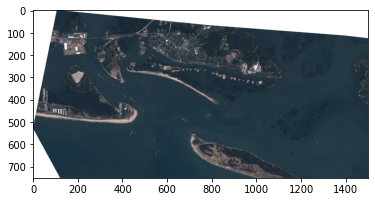

<AxesSubplot:>

In [4]:
show(clipped_img[[2,1,0], :, :])

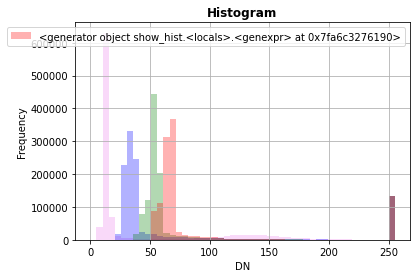

In [7]:
rasterio.plot.show_hist(clipped_img, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3)

In [8]:
clipped_img[:,0,0]

array([255, 255, 255, 255], dtype=uint8)

In [9]:
# just ignoring this error because the image has lots of NaN pixels
np.seterr(divide='ignore', invalid='ignore')

bandNIR = clipped_img[3] # fourth band
bandRed = clipped_img[2] # second band

# note that in python division of integers leads to integers so we need to specify floats in order to get floats
ndvi = (bandNIR.astype(float)-bandRed.astype(float))/(bandNIR.astype(float)+bandRed.astype(float))

In [10]:
print('\nMax NDVI: {m}'.format(m=ndvi.max()))
print('Mean NDVI: {m}'.format(m=ndvi.mean()))
print('Median NDVI: {m}'.format(m=np.median(ndvi)))
print('Min NDVI: {m}'.format(m=ndvi.min()))



Max NDVI: 1.0
Mean NDVI: -0.21384166105323213
Median NDVI: -0.4090909090909091
Min NDVI: -0.6455696202531646


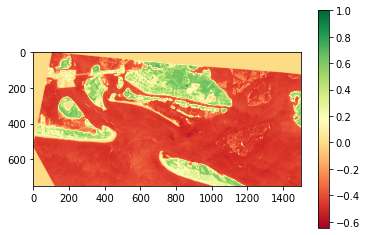

In [11]:
plt.imshow(ndvi, cmap="RdYlGn")
plt.colorbar()
plt.show()